Holt-Winters 模型是一种用于时间序的模型

Holt-Winters模型是一种用于时间序列预测的方法，通常用于对未来数据趋势和季节性进行预测。这个模型的通俗解释如下：

1. **趋势（Trend）**：趋势是指时间序列数据在长期内的变化方向，即数据是上升、下降还是保持稳定。趋势可以是线性（直线上升或下降）或非线性（曲线上升或下降）的。Holt-Winters模型会尝试捕捉数据的趋势。

2. **季节性（Seasonality）**：季节性是指时间序列数据在特定时间段内的周期性变化，例如每年的季节变化（春、夏、秋、冬）或每周的变化（工作日和周末）。Holt-Winters模型会尝试捕捉数据的季节性。

3. **平稳性（Smoothing）**：模型使用平滑技术来估计趋势和季节性的影响，以减少数据中的噪声和波动。这有助于更准确地预测未来的数据点。

Holt-Winters模型的三个主要组成部分分别是：

- **级数（Level）**：这是数据在长期内的平均水平，它表示数据的基本趋势。模型通过平滑技术来估计级数。

- **趋势（Trend）**：趋势表示数据在长期内的增长或减少。它告诉我们数据的整体趋势方向。模型通过平滑技术来估计趋势。

- **季节性（Seasonality）**：季节性表示数据在周期内的周期性波动。它告诉我们数据在不同时间段内的周期性变化。模型通过平滑技术来估计季节性。

模型通过使用历史数据来估计这三个组成部分，并然后使用它们来预测未来的数据点。具体而言，Holt-Winters模型有三种不同的形式，分别是：
- **加法模型（Additive Model）**：用于处理季节性效应与趋势之间是累积关系的情况。
- **乘法模型（Multiplicative Model）**：用于处理季节性效应与趋势之间是相乘关系的情况。
- **加法季节性和趋势模型（Additive Seasonal and Trend Model）**：用于同时考虑加法趋势和季节性的情况。

总之，Holt-Winters模型是一种强大的时间序列预测工具，可以帮助我们更好地理解和预测时间序列数据中的趋势和季节性。它在许多领域，如销售预测、股票市场分析和天气预测等方面都有广泛的应用。

In [4]:
import pandas as pd

df = pd.read_csv("气温数据.csv")
df

,日期,1,2,3,4,5,6,7,8,9,10,11,12
0,1856,-0.384,-0.457,-0.673,-0.344,-0.311,-0.071,-0.246,-0.235,-0.380,-0.418,-0.670,-0.386
1,1857,-0.437,-0.150,-0.528,-0.692,-0.629,-0.363,-0.375,-0.328,-0.495,-0.646,-0.754,-0.137
2,1858,-0.452,-1.031,-0.643,-0.328,-0.311,-0.263,-0.248,-0.274,-0.203,-0.121,-0.913,-0.197
3,1859,-0.249,-0.041,-0.082,-0.172,-0.085,-0.278,-0.220,-0.132,-0.436,-0.234,-0.288,-0.486
4,1860,-0.070,-0.526,-0.599,-0.420,-0.273,-0.063,-0.182,-0.256,-0.213,-0.326,-0.696,-0.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2001,0.343,0.307,0.505,0.432,0.456,0.415,0.447,0.502,0.407,0.390,0.523,0.348
146,2002,0.641,0.680,0.620,0.445,0.429,0.449,0.488,0.395,0.439,0.395,0.423,0.301
147,2003,0.545,0.430,0.393,0.397,0.450,0.440,0.454,0.518,0.521,0.573,0.429,0.573
148,2004,0.508,0.619,0.527,0.469,0.295,0.358,0.364,0.436,0.452,0.494,0.586,0.385


In [11]:
# 使用 melt 函数将数据列转换为新的格式
melted_df = pd.melt(df, id_vars=["日期"], var_name="月份", value_name="数据")
melted_df.to_csv('data.csv', index=False) 

In [18]:
df = pd.read_csv("data.csv")
df

,日期,月份,数据
0,1856,1,-0.384
1,1856,2,-0.457
2,1856,3,-0.673
3,1856,4,-0.344
4,1856,5,-0.311
...,...,...,...
1795,2005,8,0.510
1796,2005,9,0.526
1797,2005,10,0.514
1798,2005,11,0.493


In [20]:
# 合并 "日期" 和 "月份" 列来创建一个新的日期列
df['日期'] = df['日期'].astype(str) + '-' + df['月份'].astype(str)

In [21]:
df

,日期,月份,数据
0,1856-1,1,-0.384
1,1856-2,2,-0.457
2,1856-3,3,-0.673
3,1856-4,4,-0.344
4,1856-5,5,-0.311
...,...,...,...
1795,2005-8,8,0.510
1796,2005-9,9,0.526
1797,2005-10,10,0.514
1798,2005-11,11,0.493


In [22]:
import datetime as dt

tt = []
for i in df["日期"]:
    a = dt.datetime.strptime(i,'%Y-%m')
    b = dt.datetime.strftime(a,'%Y-%m-01')
    tt.append(b)
df['date'] = tt

In [23]:
df

,日期,月份,数据,date
0,1856-1,1,-0.384,1856-01-01
1,1856-2,2,-0.457,1856-02-01
2,1856-3,3,-0.673,1856-03-01
3,1856-4,4,-0.344,1856-04-01
4,1856-5,5,-0.311,1856-05-01
...,...,...,...,...
1795,2005-8,8,0.510,2005-08-01
1796,2005-9,9,0.526,2005-09-01
1797,2005-10,10,0.514,2005-10-01
1798,2005-11,11,0.493,2005-11-01


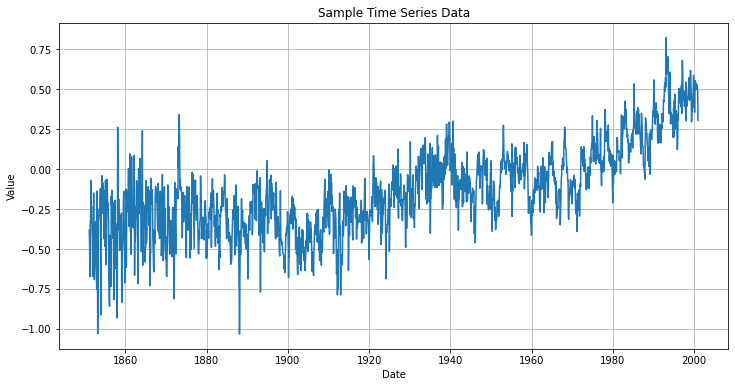

Holt-Winters模型参数:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                 1800
Model:             ExponentialSmoothing   SSE                             30.394
Optimized:                         True   AIC                          -7330.310
Trend:                         Additive   BIC                          -7286.346
Seasonal:                      Additive   AICC                         -7330.187
Seasonal Periods:                     4   Date:                 Wed, 20 Sep 2023
Box-Cox:                          False   Time:                         13:11:12
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4279202                alpha                 True
smoothi

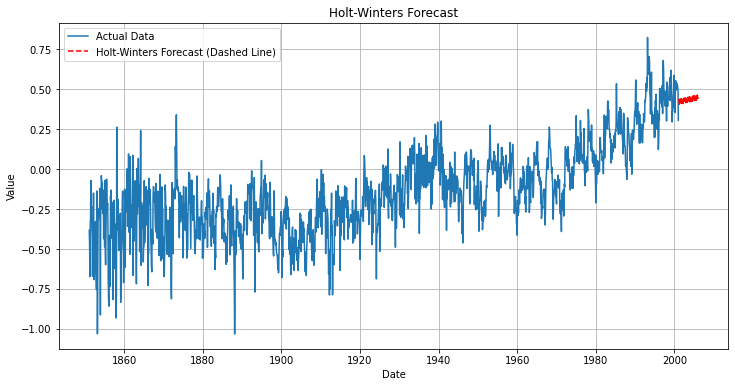

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 创建一个示例时间序列数据
data = pd.Series(list(df['数据'].values),
                 index=pd.date_range(start='1851-01-01', periods=len(df), freq='M'))

# 将时间序列数据可视化
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title("Sample Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# 使用Holt-Winters模型进行预测
model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=4)
result = model.fit()

# 打印模型参数
print("Holt-Winters模型参数:")
print(result.summary())

# 预测未来时间点的值
forecast_steps = 60
forecast = result.forecast(steps=forecast_steps)

# 将原始数据和预测数据可视化
plt.figure(figsize=(12, 6))
plt.plot(data,  label='Actual Data')
plt.plot(forecast.index, forecast, linestyle='--', color='red', label='Holt-Winters Forecast (Dashed Line)')
plt.title("Holt-Winters Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

根据Holt-Winters模型参数结果：

1. `smoothing_level`（平滑系数alpha）：这是控制级数（Level）的平滑度的参数。它决定了历史观测值对于当前级数的权重。在这个模型中，alpha 的值为 0.4279202，它表示历史观测值的影响程度，较高的值意味着更大的平滑。

2. `smoothing_trend`（趋势平滑系数beta）：这是控制趋势（Trend）的平滑度的参数。它决定了历史趋势对于当前趋势的权重。在这个模型中，beta 的值为 3.5271e-14，它接近零，表示趋势的平滑度非常高，趋势变化较小。

3. `smoothing_seasonal`（季节性平滑系数gamma）：这是控制季节性（Seasonality）的平滑度的参数。它决定了历史季节性对于当前季节性的权重。在这个模型中，gamma 的值为 0.000000，这意味着季节性的平滑度较高，季节性变化较小。

4. `initial_level`（初始级数）：这是时间序列的初始级数值，即时间序列在开始时的水平。在这个模型中，初始级数的值为 -0.4057213。

5. `initial_trend`（初始趋势）：这是时间序列的初始趋势值，即时间序列在开始时的趋势方向。在这个模型中，初始趋势的值为 0.0004706，接近零，表示趋势在开始时接近平稳。

6. `initial_seasons`（初始季节性）：这是时间序列的初始季节性成分的值。这个模型中有4个季节性成分（因为季节性周期为4），分别对应于不同的季节。例如，`initial_seasons.0` 对应于第一个季节，它的值为 -0.0151239。依此类推，`initial_seasons.1`、`initial_seasons.2`、`initial_seasons.3` 对应于后续的季节性成分。

这些参数是Holt-Winters模型中用于描述时间序列趋势和季节性的关键组成部分。模型通过调整这些参数来拟合历史数据，并使用它们来进行未来数据的预测。在这个模型中，`Optimized` 栏中的值为 `True`，表示模型已经经过参数优化以最好地拟合数据。模型的性能也通过 AIC、BIC 等指标进行了评估。

## 节选1980年数据

In [47]:
df

,日期,月份,数据,date
0,1856-1,1,-0.384,1856-01-01
1,1856-2,2,-0.457,1856-02-01
2,1856-3,3,-0.673,1856-03-01
3,1856-4,4,-0.344,1856-04-01
4,1856-5,5,-0.311,1856-05-01
...,...,...,...,...
1795,2005-8,8,0.510,2005-08-01
1796,2005-9,9,0.526,2005-09-01
1797,2005-10,10,0.514,2005-10-01
1798,2005-11,11,0.493,2005-11-01


In [50]:
df2 = df[1488:1500]
df2

,日期,月份,数据,date
1488,1980-1,1,0.129,1980-01-01
1489,1980-2,2,0.148,1980-02-01
1490,1980-3,3,0.047,1980-03-01
1491,1980-4,4,0.138,1980-04-01
1492,1980-5,5,0.203,1980-05-01
1493,1980-6,6,0.126,1980-06-01
1494,1980-7,7,0.067,1980-07-01
1495,1980-8,8,0.056,1980-08-01
1496,1980-9,9,0.040,1980-09-01
1497,1980-10,10,0.032,1980-10-01


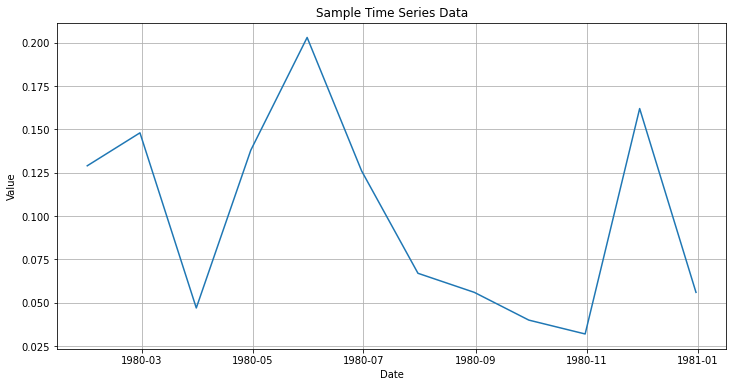

Holt-Winters模型参数:
                       ExponentialSmoothing Model Results                       
Dep. Variable:                     None   No. Observations:                   12
Model:             ExponentialSmoothing   SSE                              0.029
Optimized:                         True   AIC                            -56.202
Trend:                         Additive   BIC                            -52.323
Seasonal:                      Additive   AICC                           163.798
Seasonal Periods:                     4   Date:                 Wed, 20 Sep 2023
Box-Cox:                          False   Time:                         13:15:36
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level              1.4901e-08                alpha                 True
smoothi

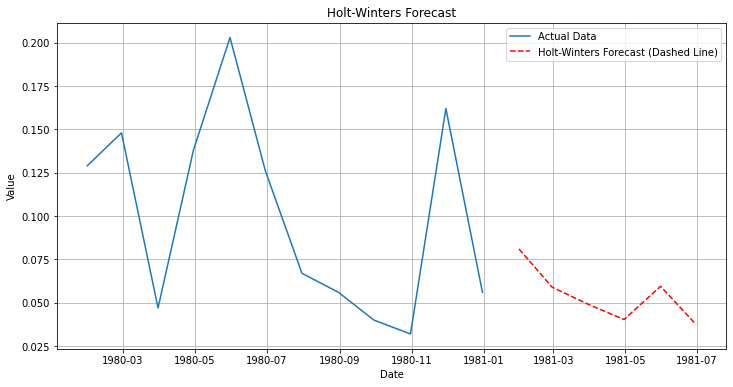

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# 创建一个示例时间序列数据
data = pd.Series(list(df2['数据'].values),
                 index=pd.date_range(start='1980-01-01', periods=12, freq='M'))

# 将时间序列数据可视化
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.title("Sample Time Series Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# 使用Holt-Winters模型进行预测
model = ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=4)
result = model.fit()

# 打印模型参数
print("Holt-Winters模型参数:")
print(result.summary())

# 预测未来时间点的值
forecast_steps = 6
forecast = result.forecast(steps=forecast_steps)

# 将原始数据和预测数据可视化
plt.figure(figsize=(12, 6))
plt.plot(data,  label='Actual Data')
plt.plot(forecast.index, forecast, linestyle='--', color='red', label='Holt-Winters Forecast (Dashed Line)')
plt.title("Holt-Winters Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

根据Holt-Winters模型参数结果，以下是对这些参数的解释：

1. `smoothing_level`（平滑系数alpha）：这是控制级数（Level）的平滑度的参数。在这个模型中，alpha 的值为 1.4901e-08，非常接近零，表示历史观测值的权重非常小，级数的平滑度非常高。

2. `smoothing_trend`（趋势平滑系数beta）：这是控制趋势（Trend）的平滑度的参数。在这个模型中，beta 的值为 2.9796e-10，接近零，表示趋势的平滑度非常高，趋势变化非常小。

3. `smoothing_seasonal`（季节性平滑系数gamma）：这是控制季节性（Seasonality）的平滑度的参数。在这个模型中，gamma 的值为 0.000000，这意味着季节性的平滑度较高，季节性变化非常小。

4. `initial_level`（初始级数）：这是时间序列的初始级数值，即时间序列在开始时的水平。在这个模型中，初始级数的值为 0.1313178。

5. `initial_trend`（初始趋势）：这是时间序列的初始趋势值，即时间序列在开始时的趋势方向。在这个模型中，初始趋势的值为 -0.0053751，表示趋势在开始时稍微下降。

6. `initial_seasons`（初始季节性）：这是时间序列的初始季节性成分的值。这个模型中有4个季节性成分（因为季节性周期为4），分别对应于不同的季节。例如，`initial_seasons.0` 对应于第一个季节，它的值为 0.0195588。依此类推，`initial_seasons.1`、`initial_seasons.2`、`initial_seasons.3` 对应于后续的季节性成分。

这些参数是Holt-Winters模型中用于描述时间序列趋势和季节性的关键组成部分。模型通过调整这些参数来拟合历史数据，并使用它们来进行未来数据的预测。在这个模型中，`Optimized` 栏中的值为 `True`，表示模型已经经过参数优化以最好地拟合数据。模型的性能也通过 AIC、BIC 等指标进行了评估。